In [159]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error
from sklearn import linear_model

In [160]:
X = pd.read_csv('14_x.csv', names=['x1','x2','x3','x4','x5', 'x6', 'x7'], header=None)
Y = pd.read_csv('14_y.csv',names=['Y'], header=None)

In [161]:
X

,x1,x2,x3,x4,x5,x6,x7
0,0.554492,0.435362,-0.714326,0.764385,0.332318,1.690328,1.084469
1,-1.443801,0.171249,0.356806,0.292753,-1.160146,0.640056,-0.187040
2,-1.671787,1.196110,-0.055890,0.015570,-0.850735,-1.381808,0.628972
3,0.779561,0.862201,1.331771,0.000843,0.613557,-0.534753,-2.266841
4,0.513284,0.719624,-0.261018,0.861236,-0.535846,-1.949803,0.813672
5,0.437861,0.527150,-1.519209,-0.920765,0.195468,-0.527456,0.704727
6,0.905799,-0.348567,-0.975581,1.072600,0.778013,2.895179,0.474996
7,-0.212832,-0.622724,0.486118,-1.258866,-2.370847,1.513594,0.431967
8,-0.830086,-1.158022,0.624042,-0.708330,1.640596,-1.368226,-1.527605
9,0.265245,-0.631375,-0.586314,2.458434,0.604669,-1.727498,0.636303


In [162]:
Y

,Y
0,290.566394
1,-84.794649
2,-172.588003
3,-2.000061
4,-64.390405
5,61.236347
6,356.697521
7,48.997911
8,-300.603777
9,-138.449438


### 3.Сделайте количественное описание датасета: количество точек данных, признаков, статистику по каждому признаку.

In [163]:
X.shape

(56, 7)

In [164]:
Y.shape

(56, 1)

In [165]:
X.describe()

,x1,x2,x3,x4,x5,x6,x7
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,0.142717,-0.068633,-0.011395,0.121132,-0.036860,-0.040398,-0.208072
std,0.999849,0.879561,1.014071,1.078122,1.015872,1.086111,1.173085
min,-1.860966,-2.156795,-1.604093,-2.350153,-2.370847,-1.949803,-2.934813
25%,-0.531781,-0.623204,-0.775599,-0.550109,-0.629991,-0.788702,-0.933554
50%,0.069058,-0.073099,-0.051117,0.067525,0.039334,-0.187428,-0.025557
75%,0.700505,0.460669,0.460778,0.749303,0.606891,0.586793,0.595408
max,3.305131,2.274336,4.121699,2.621316,2.650815,2.895179,1.911460


In [166]:
Y.describe()

,Y
count,56.000000
mean,-10.086063
std,158.625531
min,-346.530017
25%,-128.343173
50%,-27.394523
75%,91.513956
max,356.697521


### 4.Разделите все наблюдения на обучающую и тестовую выборки в соотношении 80-20.

In [167]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)

In [168]:
x_train.shape, y_train.shape

((44, 7), (44, 1))

In [169]:
x_test.shape, y_test.shape

((12, 7), (12, 1))

### 5.Для целевой и каждого из признаков постройте парную регрессионную модель. Визуализируйте линию регрессии и исходные данные на графике. При помощи коэффициентов оцените силу связи.

In [170]:
reg1 = linear_model.LinearRegression()
reg1.fit(x_train, y_train)

LinearRegression()

In [171]:
reg1.score(X, Y)

0.9976313640568909

In [172]:
x_train.columns

Index(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7'], dtype='object')

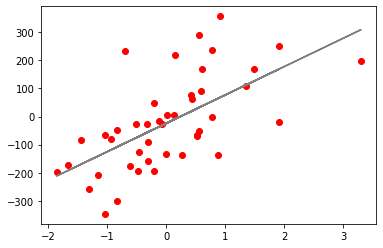

Коэффициент:  100.74451308959148


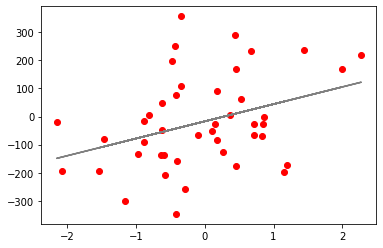

Коэффициент:  61.11418175232353


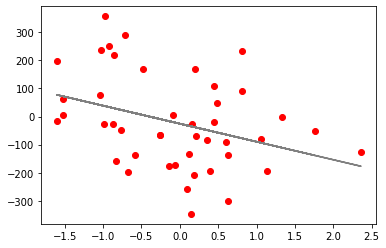

Коэффициент:  -64.144686813722


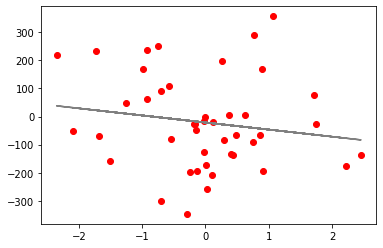

Коэффициент:  -25.185866391710537


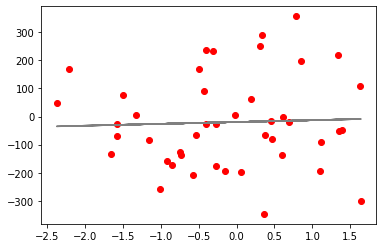

Коэффициент:  6.511188507305379


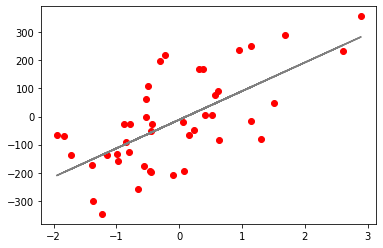

Коэффициент:  101.82317819652381


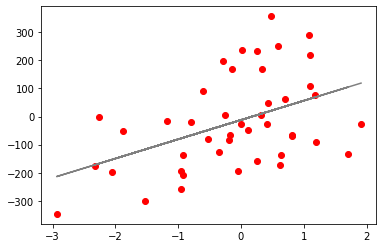

Коэффициент:  68.60681239495304


In [173]:
regs_list = []

for col in range(len(x_train.columns)):
    vals = x_train.iloc[:, col]
    lin_reg = linear_model.LinearRegression()
    lin_reg.fit(vals.values.reshape(-1, 1), y_train)
    regs_list.append(lin_reg)

    plt.figure() #строим график
    plt.scatter(vals, y_train, color='RED') #реальные данные
    plt.plot(vals, lin_reg.predict(vals.values.reshape(-1, 1)), color='GREY') #предсказанные
    plt.show()

    print("Коэффициент: ", lin_reg.coef_[0][0])

### 6. Постройте модель множественной линейной регрессии целевой переменной от всех показателей. Оцените качество регрессии, сделайте вывод.

In [174]:
multiple_lin_reg = LinearRegression()
multiple_lin_reg.fit(x_train,y_train)
multiple_lin_reg.score(x_train,y_train)

0.9981559283181357

#### Коэф детерминации стремится к 1, а это значит, что наша модель крайне хорошего качества

## Дополнительные задания
1. Для целевой переменной и каждого из признаков постройте полиномиальную регрессию второго, третьего и десятого порядков. Сделайте вывод о значимости регрессии.
2. Постройте сводную таблицу показателей точности всех построенных моделей по тестовой и обучающей выборке. Сделайте вывод, какие модели переобученнные, какие - недообученные.
3. Используйте другие метрики качества регрессионной модели в дополнение к коэффициенту детерминации.

### 1. Для целевой переменной и каждого из признаков постройте полиномиальную регрессию второго, третьего и десятого порядков. Сделайте вывод о значимости регрессии.

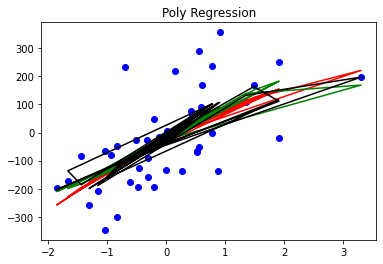

Score X1: 0.4033154776091161
Coeffs X1: [[  0.         109.83275882 -11.88105864]]

Score X1: 0.4138874897860705
Coeffs X1: [[  0.         129.03488183   1.65425032  -7.05915361]]

Score X1: 0.43552579578634976
Coeffs X1: [[   0.          148.92917706  212.71495735  -34.0486972  -357.80059605
    29.78268228  197.85936295  -14.43911861  -38.5573334     2.15089387
     1.81100917]]


----------------------------------------------------------------------------------------------------


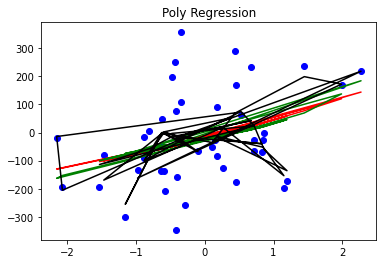

Score X2: 0.12785159687122039
Coeffs X2: [[ 0.         61.15056901  5.12720256]]

Score X2: 0.13409142585210165
Coeffs X2: [[ 0.         40.45343791  4.85280525  7.58054468]]

Score X2: 0.3261444320451651
Coeffs X2: [[    0.           150.37335299   780.96124793  -374.76574861
  -1860.6309933    319.09417273  1289.77846181   -81.31286496
   -333.88522336     5.94847024    28.92268567]]


----------------------------------------------------------------------------------------------------


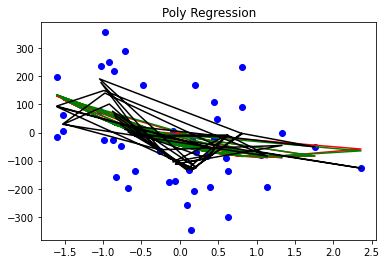

Score X3: 0.15398341084848588
Coeffs X3: [[  0.         -68.025246    26.75298734]]

Score X3: 0.15412370485976634
Coeffs X3: [[  0.         -64.59345692  28.06234871  -1.60147087]]

Score X3: 0.29845236015959653
Coeffs X3: [[    0.          -160.77017715   562.6103751    893.02982583
  -1005.88541264 -1573.04565865   996.17584347   894.49820104
   -449.04845828  -158.66114664    72.27539428]]


----------------------------------------------------------------------------------------------------


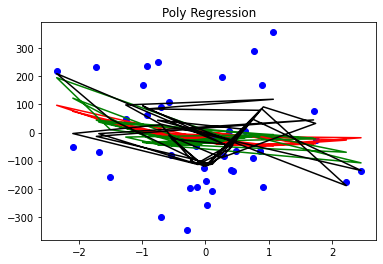

Score X4: 0.0416330594769978
Coeffs X4: [[  0.         -25.44686636  13.15430321]]

Score X4: 0.08038962571361219
Coeffs X4: [[  0.          29.54323641  16.36435937 -16.2956144 ]]

Score X4: 0.2967319997294342
Coeffs X4: [[ 0.00000000e+00  1.65082832e+01  4.09415853e+02 -3.89262490e+01
  -2.35494064e+02  3.83039435e+01  5.21653427e+01 -1.11519162e+01
  -5.72167694e+00  8.83411601e-01  3.07762646e-01]]


----------------------------------------------------------------------------------------------------


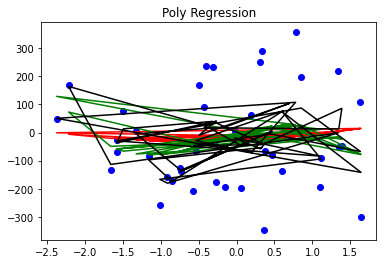

Score X5: 0.0063547252502601514
Coeffs X5: [[ 0.         10.86339644  9.57163928]]

Score X5: 0.07892211243377978
Coeffs X5: [[  0.          83.1945123  -21.21902692 -33.98672769]]

Score X5: 0.23751459036367728
Coeffs X5: [[    0.          -339.78533192   225.28809527  2139.98770448
   -366.74593963 -2965.30942837  -122.88135546  1493.78311616
    272.54639968  -249.22005194   -70.41912025]]


----------------------------------------------------------------------------------------------------


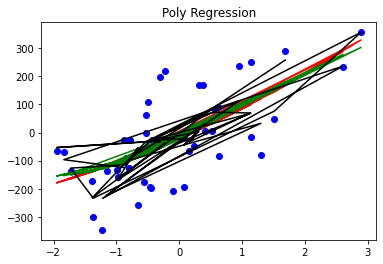

Score X6: 0.45560808770864125
Coeffs X6: [[ 0.         97.08496286  8.31381015]]

Score X6: 0.4590842404196387
Coeffs X6: [[  0.         110.56893088  13.68526066  -4.44507705]]

Score X6: 0.5591644241720808
Coeffs X6: [[   0.           25.47321514  412.98406913  345.98736072 -698.7763479
  -329.2490115   371.71166509  109.30290557  -77.42944596  -11.38077067
     5.90039896]]


----------------------------------------------------------------------------------------------------


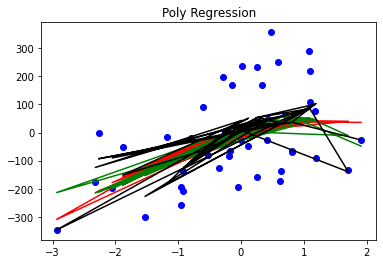

Score X7: 0.2396276739744604
Coeffs X7: [[  0.          51.34456342 -19.43112721]]

Score X7: 0.26776445723550446
Coeffs X7: [[  0.          87.1198073  -37.60911605 -13.74422339]]

Score X7: 0.35774791740791856
Coeffs X7: [[   0.          106.53000544 -217.34328938 -144.76104594  190.91448097
   246.68027484  -45.82740068 -121.75336065  -12.51790372   17.38222541
     3.97219745]]


----------------------------------------------------------------------------------------------------


In [177]:
from sklearn.preprocessing import PolynomialFeatures

r2_2 = []
r2_3 = []
r2_10 = []

r2 = []
mse = []

for col in range(len(x_train.columns)):
    X_vals = x_train.iloc[:, col]

    poly2 = PolynomialFeatures(degree = 2)
    X_poly2 = poly2.fit_transform(X_vals.values.reshape((-1, 1)))
    lin2 = LinearRegression()
    lin2.fit(X_poly2, y_train)
    lin2_predict = lin2.predict(X_poly2)
    poly2_r2 = lin2.score(X_poly2, y_train)
    poly2_mse = mean_squared_error(X_vals, lin2_predict)

    poly3 = PolynomialFeatures(degree = 3)
    X_poly3 = poly3.fit_transform(X_vals.values.reshape((-1, 1)))
    lin3 = LinearRegression()
    lin3.fit(X_poly3, y_train)
    lin3_predict = lin3.predict(X_poly3)
    poly3_r2 = lin3.score(X_poly3, y_train)
    poly3_mse = mean_squared_error(X_vals, lin3_predict)

    poly10 = PolynomialFeatures(degree = 10)
    X_poly10 = poly10.fit_transform(X_vals.values.reshape((-1, 1)))
    lin10 = LinearRegression()
    lin10.fit(X_poly10, y_train)
    lin10_predict = lin10.predict(X_poly10)
    poly10_r2 = lin10.score(X_poly10, y_train)
    poly10_mse = mean_squared_error(X_vals, lin10_predict)



    plt.scatter(x_train.iloc[:, col], y_train, color = 'blue' )
    plt.plot(x_train.iloc[:, col], lin2_predict, color = 'red' )
    plt.plot(x_train.iloc[:, col], lin3_predict, color = 'green' )
    plt.plot(x_train.iloc[:, col], lin10_predict, color = 'black' )
    plt.title( 'Poly Regression' )
    plt.show()

    r2.append([poly2_r2, poly3_r2, poly10_r2])
    mse.append([poly2_mse, poly3_mse, poly10_mse])

    print(f"Score X{col+1}: {poly2_r2}")
    print(f"Coeffs X{col+1}: {lin2.coef_}\n")

    print(f"Score X{col+1}: {poly3_r2}")
    print(f"Coeffs X{col+1}: {lin3.coef_}\n")

    print(f"Score X{col+1}: {poly10_r2}")
    print(f"Coeffs X{col+1}: {lin10.coef_}\n\n\n{'-'*100}")

In [178]:
r2

[[0.4033154776091161, 0.4138874897860705, 0.43552579578634976],
 [0.12785159687122039, 0.13409142585210165, 0.3261444320451651],
 [0.15398341084848588, 0.15412370485976634, 0.29845236015959653],
 [0.0416330594769978, 0.08038962571361219, 0.2967319997294342],
 [0.0063547252502601514, 0.07892211243377978, 0.23751459036367728],
 [0.45560808770864125, 0.4590842404196387, 0.5591644241720808],
 [0.2396276739744604, 0.26776445723550446, 0.35774791740791856]]

### Полиномиальная регрессия дала результаты хуже линейной

### 2. Cводная таблица показателей точности всех построенных моделей

In [189]:
print("R2 for ")
for i in range(len(r2)):
    print(f"x{i}: {r2[i]}")

R2 for 
x0: [0.4033154776091161, 0.4138874897860705, 0.43552579578634976]
x1: [0.12785159687122039, 0.13409142585210165, 0.3261444320451651]
x2: [0.15398341084848588, 0.15412370485976634, 0.29845236015959653]
x3: [0.0416330594769978, 0.08038962571361219, 0.2967319997294342]
x4: [0.0063547252502601514, 0.07892211243377978, 0.23751459036367728]
x5: [0.45560808770864125, 0.4590842404196387, 0.5591644241720808]
x6: [0.2396276739744604, 0.26776445723550446, 0.35774791740791856]


#### Чем ближе коэф детерминации к 1, тем лучше. Как мы видим, наиболее точные данные у х5, а наименее точные у х4. Можно сказать, что все модели недообучены

### 3. Используйте другие метрики качества регрессионной модели в дополнение к коэффициенту детерминации.

In [187]:
print("MSE for ")
for index, values in enumerate(mse):
    print(f"x{index}: {values}")

MSE for 
x0: [11008.572386999074, 11291.48890441996, 11870.549358975464]
x1: [3729.298317760612, 3896.281731610713, 9035.792239440636]
x2: [4641.152581416176, 4644.9069748487755, 8507.271096081058]
x3: [1588.0669233142098, 2625.2273581797626, 8414.7431100222]
x4: [572.145360499955, 2514.11365533853, 6758.190449244809]
x5: [12373.781707025326, 12466.80666788966, 15145.042047888262]
x6: [6666.514252751006, 7419.479780826436, 9827.517792093788]
